In [17]:
# 📦 Imports
import json
import matplotlib.pyplot as plt
from pathlib import Path
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 14,
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
    "axes.grid": True,
    "grid.alpha": 0.3,
    "lines.linewidth": 2,
    "lines.markersize": 8,
    "figure.dpi": 150,
    "savefig.dpi": 300,
    "figure.figsize": [8, 6],
    "legend.frameon": False
})

# 📥 Load data function
def extract_error_data(json_file):
    with open(json_file, "r") as f:
        data = json.load(f)

    photon_states = data["n_photon_states"]
    errors = [data["energies"][str(n)]["error"] for n in photon_states]
    label = f"{data['level_of_theory']} ({data['photon_state_type']})"
    return photon_states, errors, label


In [25]:
# 📁 Select files (manually or with glob)
from glob import glob

# You can manually specify files like this:
files = [
    "pn_casscf_2e2o.txt_analysis.json",
    "cs_casscf_2e2o.txt_analysis.json",
    "pn_casscf_4e4o.txt_analysis.json",
    "cs_casscf_4e4o.txt_analysis.json"
]

# Or automatically load all .json files in current directory:
#json_files = sorted(glob("*.json"))

files


['pn_casscf_2e2o.txt_analysis.json',
 'cs_casscf_2e2o.txt_analysis.json',
 'pn_casscf_4e4o.txt_analysis.json',
 'cs_casscf_4e4o.txt_analysis.json']

In [26]:
# 🎨 Define custom styles per file
# Optional: Add or override style elements here

color1 = "forestgreen"
color2 = "rebeccapurple"
color3 = "salmon"
color4 = "dodgerblue"


styles = {
    "cs_casci_2e2o.txt_analysis.json": {
        "color": color1,
        "linestyle": "-",
        "marker": "o",
        "markerfacecolor": color1,
        "markeredgecolor": color1,
    },
    "pn_casci_2e2o.txt_analysis.json": {
        "color": color1,
        "linestyle": "-.",
        "marker": "o",
        "markerfacecolor": color1,
        "markeredgecolor": color1,
    },
    "cs_casci_4e4o.txt_analysis.json": {
        "color": color2,
        "linestyle": "-",
        "marker": "o",
        "markerfacecolor": color2,
        "markeredgecolor": color2,
    },
    "pn_casci_4e4p.txt_analysis.json": {
        "color": color2,
        "linestyle": "-.",
        "marker": "o",
        "markerfacecolor": color2,
        "markeredgecolor": color2,
    },
    
    # Add other filenames with different styles as needed
}


In [27]:
# 📊 Plot errors with styles

plt.figure(figsize=(8, 6))


photon_states_1, errors_1, label_1 = extract_error_data(files[0])
style_1 = styles.get(files[0], {})

photon_states_2, errors_2, label_2 = extract_error_data(files[1])
style_2 = styles.get(files[1], {})

photon_states_3, errors_3, label_3 = extract_error_data(files[2])
style_3 = styles.get(files[2], {})

photon_states_4, errors_4, label_4 = extract_error_data(files[3])
style_4 = styles.get(files[3], {})
    
    #plt.plot(
    #    photon_states, errors,
    #    label=label,
    #    color=style.get("color", None),
    #    linestyle=style.get("linestyle", "-"),
    #    marker=style.get("marker", "o"),
    #    markerfacecolor=style.get("markerfacecolor", "white"),
    #    markeredgecolor=style.get("markeredgecolor", "black"),
    #)





<Figure size 1200x900 with 0 Axes>

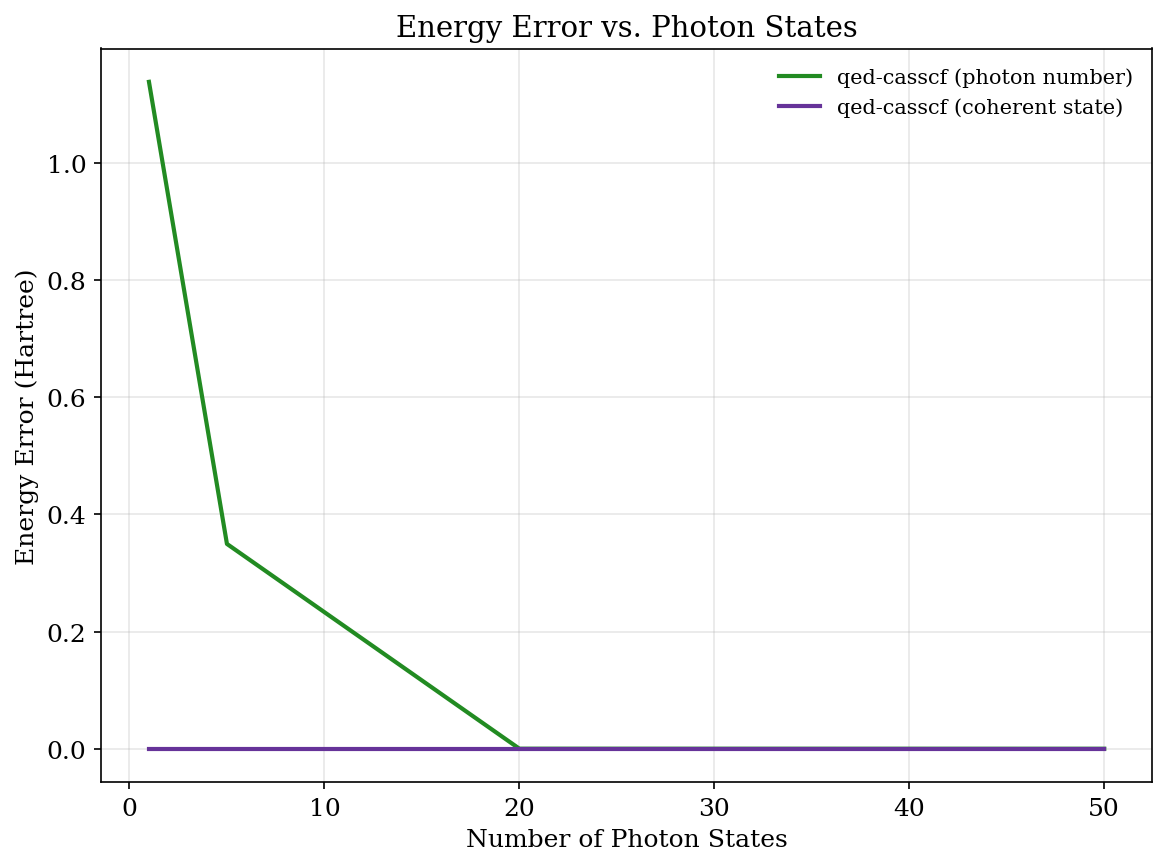

In [30]:

plt.plot(photon_states_1, errors_1, color=color1, label=label_1)
plt.plot(photon_states_2, errors_2, color=color2, label=label_2)

plt.xlabel("Number of Photon States", fontsize=12)
plt.ylabel("Energy Error (Hartree)", fontsize=12)
plt.title("Energy Error vs. Photon States", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.savefig("error_vs_photon_states.png", dpi=300)
plt.show()